In [1]:
from src.TWIG_utils import *

In [2]:
from prophet import Prophet

/Users/adampetranovich/projects/twigINV/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [6]:
ezpw_prices = read_csv_s3('twig-stockdata', "ezpw_daily_stock_prices.csv")

In [7]:
ezpw_prices.head()

,Unnamed: 0,date,open,close,high,low,ticker
0,0,2018-04-30,13.350,13.700,13.750,13.350,EZPW
1,1,2018-05-01,13.650,13.700,13.900,13.350,EZPW
2,2,2018-05-02,13.750,13.950,14.100,13.600,EZPW
3,3,2018-05-03,13.700,14.600,14.650,13.610,EZPW
4,4,2018-05-04,14.650,14.800,14.950,14.500,EZPW


In [12]:
ezpw_prices['y'] = ezpw_prices['open'].values
ezpw_prices['ds'] = [pd.to_datetime(x) for x in ezpw_prices['date'].values]

In [13]:
m = Prophet()
m.fit(ezpw_prices[['ds', 'y']][5:500])

21:32:23 - cmdstanpy - INFO - Chain [1] start processing
21:32:23 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
855,2021-04-19
856,2021-04-20
857,2021-04-21
858,2021-04-22
859,2021-04-23


In [15]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
855,2021-04-19,0.752,-4.020,5.413
856,2021-04-20,0.744,-4.116,5.529
857,2021-04-21,0.672,-4.076,5.228
858,2021-04-22,0.672,-4.140,5.365
859,2021-04-23,0.631,-4.291,5.274


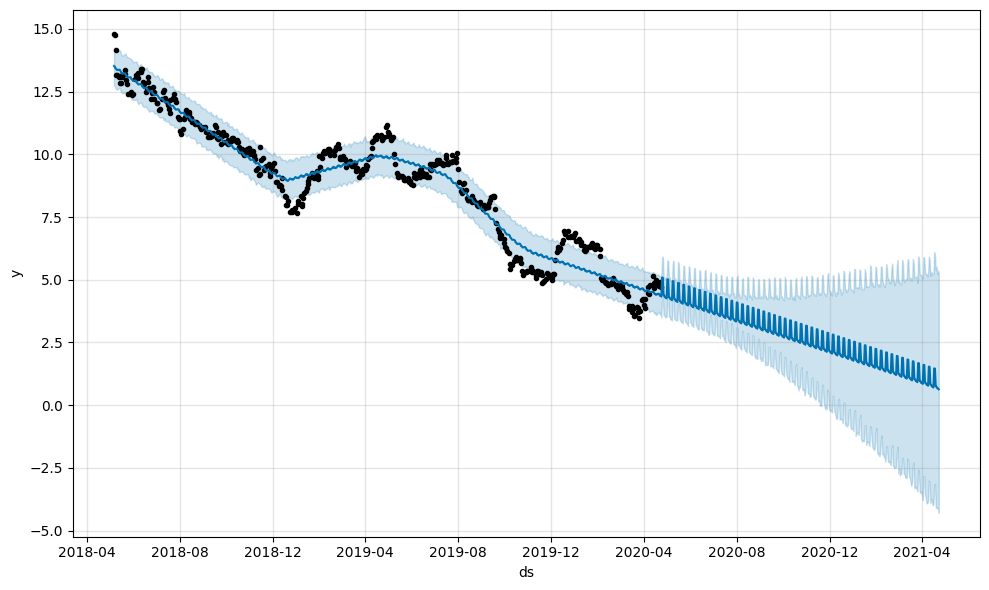

In [16]:
fig1 = m.plot(forecast)


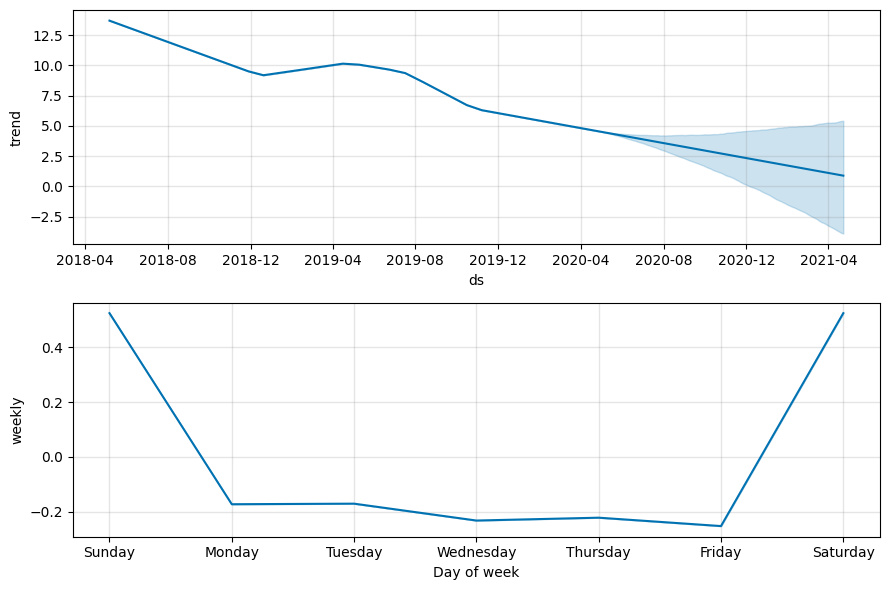

In [17]:
# Python
fig2 = m.plot_components(forecast)
